# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [167]:
import pandas as pd

data = pd.read_csv('demo01.csv')

lista_nao_numerica = []

for x in data.columns:
  if data[x].dtype == 'object':
    lista_nao_numerica.append(x)

print(lista_nao_numerica)

['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']


In [168]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [169]:
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [170]:
data.shape

(16650, 16)

In [171]:
data.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [173]:
data_com_dummies = pd.get_dummies(data, columns=lista_nao_numerica, drop_first=True)
data_com_dummies.mau = data_com_dummies.mau.astype(int)
data_com_dummies

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [174]:
data_com_dummies.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_M                                      uint8
posse_de_veiculo_Y                          uint8
posse_de_imovel_Y                           uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8


In [175]:
from sklearn.model_selection import train_test_split

X = data_com_dummies.drop('mau', axis=1)
y = data_com_dummies.mau

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

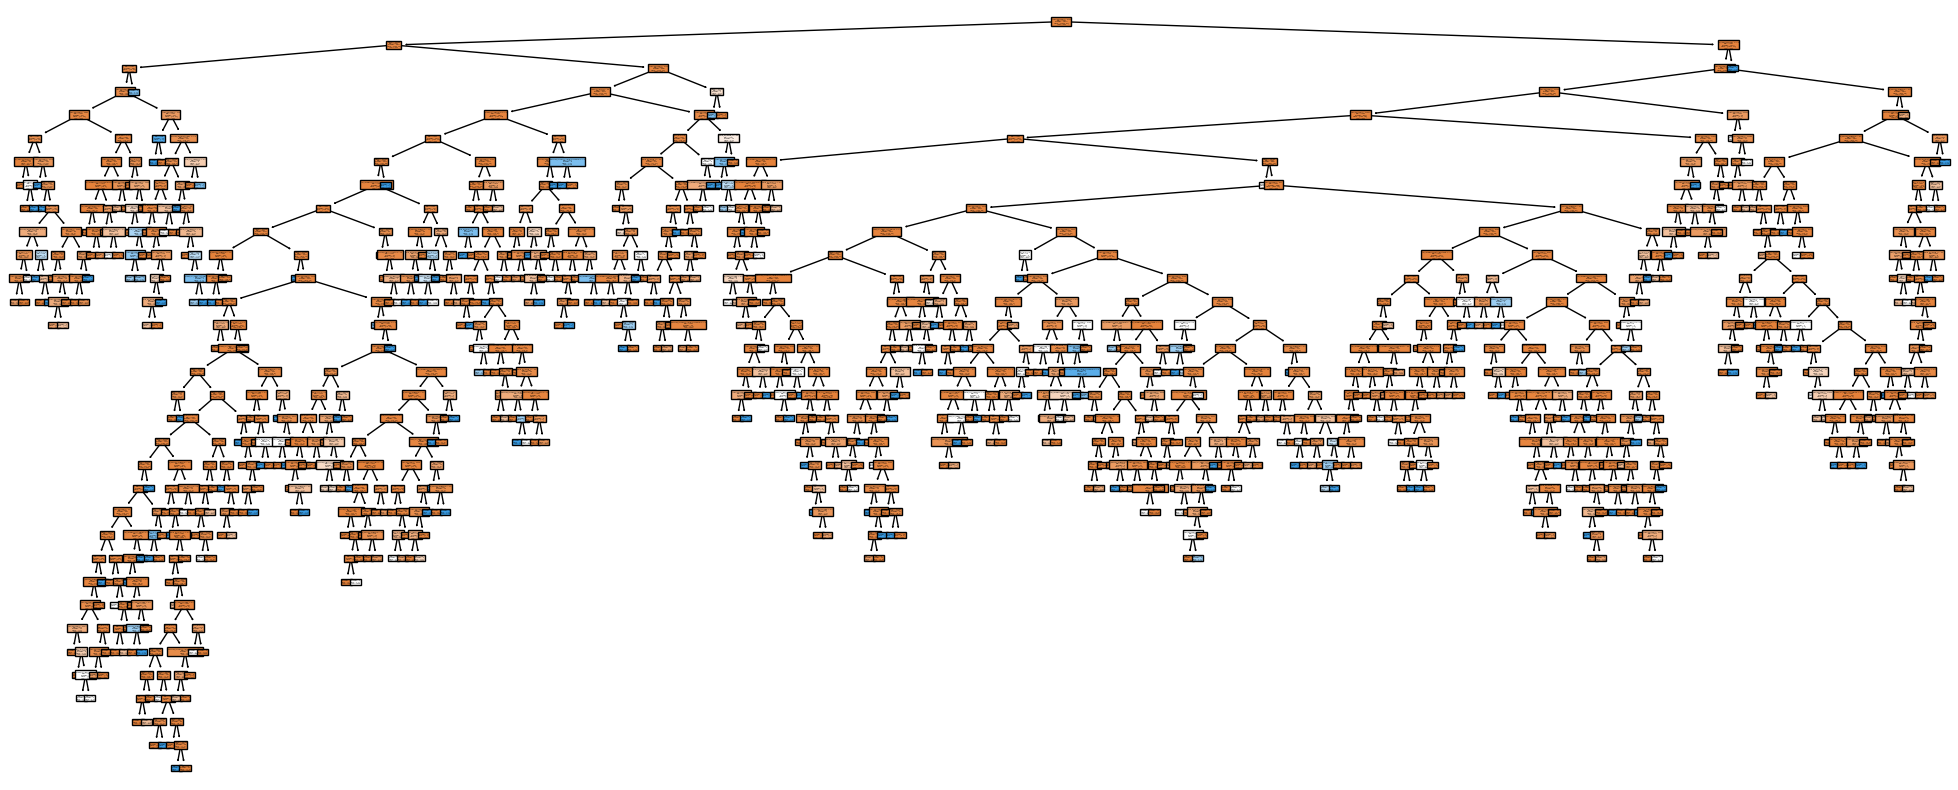

In [176]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X,y)

plt.figure(figsize= (25, 10))
plot_tree(clf,
          filled=True,
          class_names=['mau', 'bom'],
          feature_names=X.columns
          );

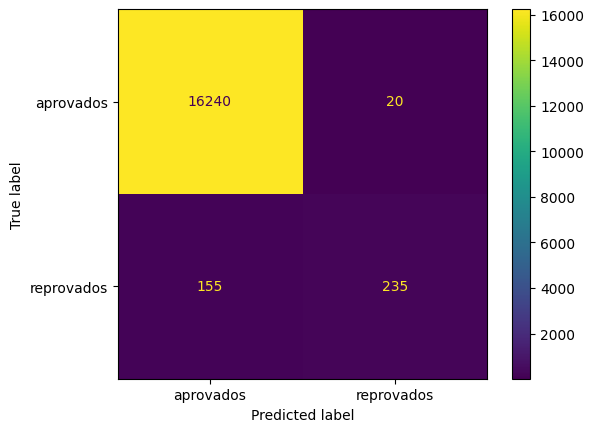

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# plot_confusion_matrix(clf, X, y, display_labels=['mau', 'bom'])
ConfusionMatrixDisplay.from_estimator(clf, X, y, display_labels=['aprovados', 'reprovados']);

In [178]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9894894894894894

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

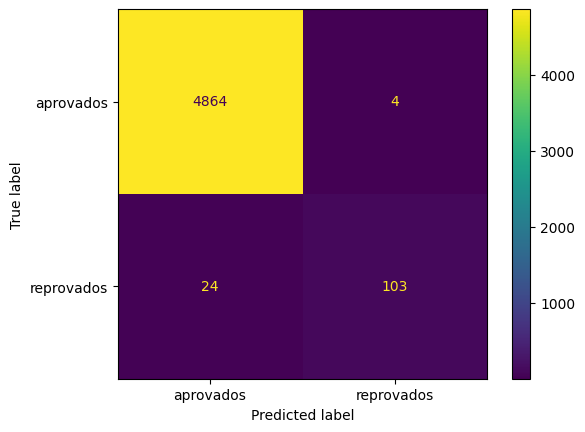

In [179]:
# 1 e 2
clf.fit(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [180]:
# 3
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9943943943943944

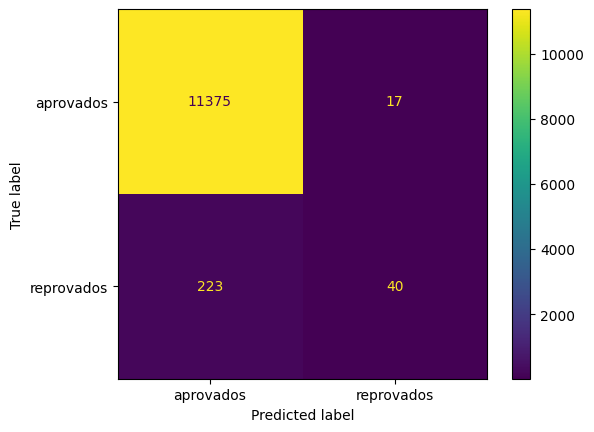

In [181]:
# 4 (Construção de Nova Árvore)
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore.fit(X_train, y_train)

# 4 (Matriz d Classificação - ou confusão)
matriz_confusao = ConfusionMatrixDisplay.from_estimator(nova_arvore, X_train, y_train, display_labels=['aprovados', 'reprovados']);
# print(int(str(list(matriz_confusao.text_[1])[0])[-5:-2]));
# print(matriz_confusao)

In [182]:
print(f'Como podemos ver acima, a quantidade de dados totais no "y_train" é de {y_train.value_counts().sum()}')
print(f'Sendo que a proporção d clientes classificados como "maus" nessa nova distribuição é de {((y_train == 1).sum())/((y_train == 0).sum())}')

Como podemos ver acima, a quantidade de dados totais no "y_train" é de 11655
Sendo que a proporção d clientes classificados como "maus" nessa nova distribuição é de 0.02308637640449438


In [183]:
# 5

data_com_dummies
data_com_dummies.loc[data_com_dummies.mau == 1] = 0
data_com_dummies.mau.value_counts()

0    16650
Name: mau, dtype: int64

In [184]:
novo_x = data_com_dummies.drop('mau', axis=1)
novo_y = data_com_dummies.mau

In [189]:
X_train_nova_clf, X_test_nova_clf, y_train_nova_clf, y_test_nova_clf = train_test_split(novo_x, novo_y, test_size=0.3, random_state=100)

In [199]:
nova_clf = DecisionTreeClassifier(random_state=100)
nova_clf.fit(X_train_nova_clf, y_train_nova_clf)

new_predict = nova_clf.predict(X_train_nova_clf)

In [200]:
accuracy_score(y_train_nova_clf, new_predict)

1.0

In [201]:
## Realizando a poda

nova_clf_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_clf_2.fit(X_train_nova_clf, y_train_nova_clf)
segundo_predict = nova_clf_2.predict(X_train_nova_clf)

In [202]:
accuracy_score(y_train_nova_clf, segundo_predict)

1.0

In [203]:
## Podemos concluir que o algoritimo devido o índice Gini ser 0, vai sempre classificar o cliente como bom pagador.